Importación de las bibliotecas requeridas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

Cargar y limpiar los datos

In [5]:
# Cargamos los datos en un DataFrame de Pandas
data = pd.read_csv('kc_house_data.csv')

dropColumns = ['id', 'date', 'zipcode']
data = data.drop(dropColumns, axis = 1)

y = data['price']
X = data.drop('price', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


Mostrar cabecera

In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.0,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,47.721,-122.319,1690,7639
2,2,1.0,770,10000,1.0,0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.0,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.0,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503


Construcción y evaluación del modelo: Regresión lineal

In [6]:
# Construimos el modelo de regreseion lineal
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

# Evaluando el modelo
print(linearModel.score(X_test, y_test))

0.7068657331256638


**CON** L2 (Ridge):

In [7]:
# Listamos los diferentes valores de puntaje cross-validation
cross_val_scores_ridge = []
 
# Listado de los diferentes valores de alfa
alpha = []
 
# Ciclo para realizar la evaluacion con diferentes valores de alfa y cross-validation
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Imprimir los diferentes valores de puntaje obtenidos
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 69.09054518942588
0.5 : 69.09072137529209
0.75 : 69.09087784703381
1.0 : 69.09101480860032
1.25 : 69.09113245997607
1.5 : 69.09123099929465
1.75 : 69.09131062161322
2.0 : 69.09137152065287


Del resultado anterior, podemos concluir que el mejor valor de alfa para los datos es 2, por lo cual obtenemos la precision del test.

In [8]:
# Contruyendo el modelo de regresion Ridge
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)

# Evaluando el modelo de regresion Ridge
print(ridgeModelChosen.score(X_test, y_test))

0.7068047173944405


**CON** L1 (Lasso):

In [9]:
# Listamos los diferentes valores de puntaje cross-validation
cross_val_scores_lasso = []

# Listado de los diferentes valores de lamda
Lambda = []

# Ciclo para realizar la evaluacion con diferentes valores cross-validation
for i in range(1, 9):
	lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
	lassoModel.fit(X_train, y_train)
	scores = cross_val_score(lassoModel, X, y, cv = 10)
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_lasso.append(avg_cross_val_score)
	Lambda.append(i * 0.25)

# Imprimir los diferentes valores de puntaje obtenidos
for i in range(0, len(alpha)):
	print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.373e+14, tolerance: 2.022e+14
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.920e+14, tolerance: 2.381e+14
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

0.25 : 69.08976825353878
0.5 : 69.0897737166553
0.75 : 69.08977915096767
1.0 : 69.08978455947184
1.25 : 69.08978993701714
1.5 : 69.0897952932222
1.75 : 69.08980061696388
2.0 : 69.0898059214467


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.962e+14, tolerance: 2.414e+14
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Del resultado anterior, podemos concluir que el mejor valor de lambda es 2, ontenemos su puntaje de test.

In [10]:
# Construyendo el modelo de Regresion Lasso
lassoModelChosen = Lasso(alpha = 2.0, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)

# Evaluando el modelo de Regresion Lasso
print(lassoModelChosen.score(X_test, y_test))

0.7068557418016082


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.373e+14, tolerance: 2.022e+14
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Comparar y visualizar los resultados

In [11]:
# Construyendo las listas para visualizacion
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
		ridgeModelChosen.score(X_test, y_test),
		lassoModelChosen.score(X_test, y_test)]

# Construyendo el diccionario para comparar puntajes
mapping = {}
mapping['Linear Regression'] = linearModel.score(X_test, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)

# Imprimir puntajes de cada modelo
for key, val in mapping.items():
	print(str(key)+' : '+str(val))

Linear Regression : 0.7068657331256638
Ridge Regression : 0.7068047173944405
Lasso Regression : 0.7068557418016082


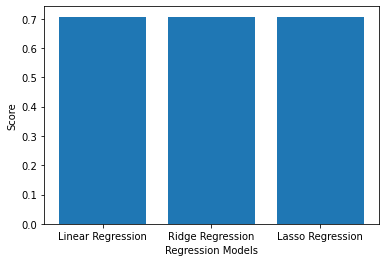

In [12]:
# Manera grafica
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()